Vamos começar importando o módulo *nn* e o *torch*

In [1]:
import torch
from torch import nn #neural networks

Agora vamos instanciar nossa camada linear, como vimos nos slides com uma entrada de dimesionalidade $d = 3$ e asída de tamanho $1$, já que estamos instanciando um perceptron simples.

In [2]:
torch.manual_seed(42)

# perceptron = nn.Linear(in_features = 3, out_features = 1)
perceptron = nn.Linear(3, 1)
print(perceptron)

Linear(in_features=3, out_features=1, bias=True)


Temos em mãos exatameteo mesmo modelo da imagem clássica do perceptron!

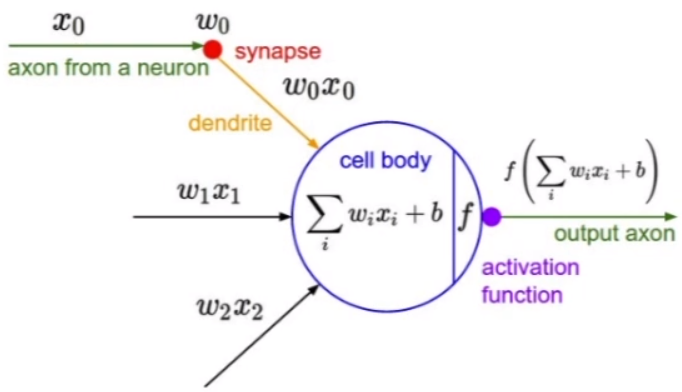

Os pesos $w$ e o viés $b$ são inicializados aleatoriamente pelo _pytorch_. Podemos consultar essa informação de duas formas:

- iterado em seus `named_parameters`
- acessando cada parâmetro individualmennte através do seu ome padrão.

In [3]:
for nome, tensor in perceptron.named_parameters():
    print(nome, tensor.data)
    
print('')
print(perceptron.weight.data)
print(perceptron.bias.data)

weight tensor([[ 0.4414,  0.4792, -0.1353]])
bias tensor([0.5304])

tensor([[ 0.4414,  0.4792, -0.1353]])
tensor([0.5304])


In [4]:
# w1 * x1 + w2 * x2 + w3 * x3 + b = 0

w1, w2, w3 = perceptron.weight.data.numpy()[0]
b = perceptron.bias.data.numpy()

print(w1,w2,w3)
print(b)

0.4414065 0.47920525 -0.13525727
[0.53036046]


É importante não se esuecer que no perceptron esses valores definem um hiperplano no espaço. Como 3 dimensões está no limite da nossa capacidade de visualização, vamos aproveitar esse momento para visualizar o plano aleatoriamente inicializado pelo _torch_

Para isso, usaremos aqui a biblioteca de visualização _matplotlib_, com o toolkit de plot 3D.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(perceptron):
    
    w1, w2, w3 = perceptron.weight.data.numpy()[0]
    b = perceptron.bias.data.numpy()
        
    X1 = np.linspace(-1,1,10)
    X2 = np.linspace(-1,1,10)
    
    X1, Y2 = np.meshgrid(X1, X2)
    
    X3 = (b - w1 * X1 - w2 * X2) / w3
    
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection='3d')
    ax.view_init(azim = 180)
    
    ax.plot_surface(X1, X2, X3, cmap  = 'plasma')
    
    plt.show()


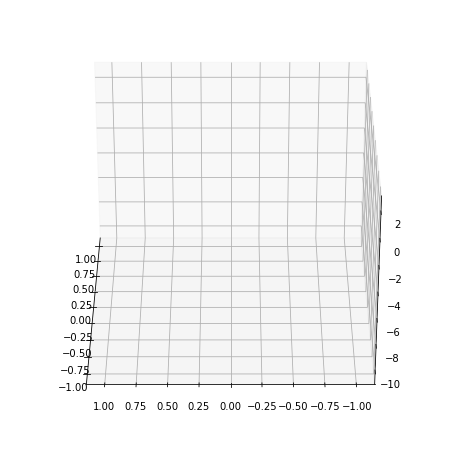

In [6]:
plot3d(perceptron)

## Foward

O fluxo da informação de entrada através da rede recebe o nome de _foward_, já que a informação é passada para a _frente_. Vamos então realizar o _foward_ da nossa rede de um perceptron só. Para issom basta realizar uma chamada de função com a variável onde instaciamos a camada `Linear`.

- Fizemos anterormente a instância da camada:
    - linear = nn.Linear(in_features = 3, out_features = 1)
    
    
- Para realizar o forward
  - y = linear(x)

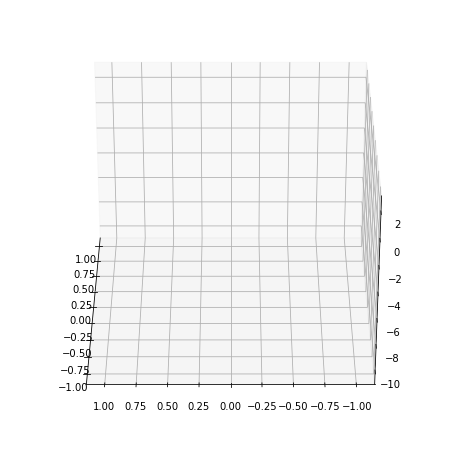

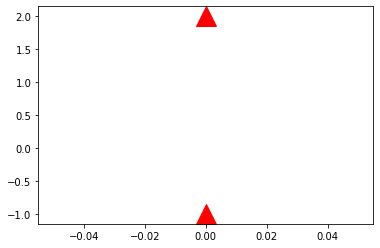

In [7]:
X = torch.Tensor([0, -1, 2])
y = perceptron(X)

plot3d(perceptron)
plt.plot([X[0]], [X[1]], [X[2]], color = 'red', marker = '^', markersize=20)